<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - In-class Exam



---
#### Guidelines 
- This is your notebook for your in-class midterm exam. 
- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, if you do, your answers will be considered invalid = **0%**).
- The in-class exam is **10%** of your total midterm score.
- During the exam you can only have the following websites open in your browser:
    * [ECON-628-01 github][1]
    * ECON-628-01-yourgithubusersname 
    * [StackOverflow][2]  
- If we noticed that your computer browser has other websites open, you will be asked to **close your computer, leave the class, and will get an score of 0%**
- Remember: if you are using code from someone else/online (StackOverflow) you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
    


- Once you are done with your exam use this [link][3] to **submit** the GitHub link to your take home exam.
[1]:https://github.com/jrcmalunay/ECON628-01 "ECON-628-01 github"
[2]:http://stackoverflow.com "StackOverflow"
[3]: https://docs.google.com/forms/d/e/1FAIpQLSercXrXIky91taz98tPviIqA8C0FaQZ_WIfNoRYxMbV5wPtkg/viewform "link"

---



### Dataset 
This dataset comes from the Sleep and the allocation of time [paper][1] by Biddle, Jeff and Hamermesh, Daniel where using aggregated data for 12 countries, a cross section of microeconomic data, and a panel of households, they demonstrate that increases in time in the labor market reduce sleep!!!! The variables are:
https://www.jstor.org/stable/2937618?seq=1#page_scan_tab_contents

| **Name**   |      **Description**     |  
|----------|:-------------:|
| age | in years | 
| black | =1 if black | 
| case | identifier | 
| clerical | =1 if clerical worker |
| construc | =1 if construction worker |
| educ | years of schooling|
| earns74 | total earnings, 1974 |
| gdhlth | =1 if in good or excellent health |
| inlf |  =1 if in labor force |
|leis1  |sleep - totwrk|
|leis2  |slpnaps - totwrk|
|leis3  |rlxall - totwrk|
| smsa |  =1 if living in SMSA |
| | SMSA is the Standard Metropolitan Statistical Area, an integrated economic and social unit having a large population nucleus. It is a good indicator of living in a city.|
|lhrwage| log hourly wage|
|lothinc | log othinc, unless othinc < 0
| male |  =1 if male |
| marr | =1 if married |
| prot | =1 if Protestant |
|rlxall |slpnaps + personal activs|
| selfe  | =1 if self employed|
| sleep | minutes sleep at night, per week |
| slpnaps | minutes sleep, including naps, per week |
| south |  =1 if live in south |
| spsepay |  spousal wage income |
| spwrk75 |  =1 if spouse works |
| totwrk | minutes worked per week |
| union |  =1 if belong to union |
| worknrm | minutes work main job |
| workscnd | minutes work second job |
|exper     | age - educ - 6 |
| yngkid | =1 if children less than 3 years present |
| yrsmarr | years married |
| hrwage | hourly wage |
|agesq   |age^2|


[1]:https://core.ac.uk/download/pdf/6820141.pdf "paper"


---


---

## The Scenario
---
The PI (principal investigator) of a project you are working for, claims that nowadays people sleep "more" because access to the internet and the mechanization of labor reduces their work time. Based on this assumption, he wants to implement a literacy program that requires participants to read 1 chapter of a book one hour before their bed time and one section of an introduction to mathematics book one hour before they leave their home for work.

**He asks you to find out if people are indeed sleeping more or not, before he implements the literacy program.** 
Assume that, you don't have any other dataset but the one from the Biddle and Hamermesh paper to answer this question. 
Use all the predictive methods, you consider neccesary to give  an answer to the PI, and make sure you explain the output of your predictive analysis.


---

### Basic package imports
---

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

#All the formulas are from MEGA lab solution

## 1. Read/load the dataset "sleep_bh.csv" and do an initial overview of the data
    Check the shape of your data
    Cheeck the type of values
    Identify which variables have missing values
    Print a list of the indices where there are missing values
---

In [2]:
slp = pd.read_csv('C:\\Users\\Shiv\\Desktop\\ECON628-01-spgunjal\\class_exam\\sleep_bh.csv') 

In [3]:
print slp.shape[0]

706


In [4]:
print slp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
age         706 non-null int64
black       706 non-null int64
case        706 non-null int64
clerical    706 non-null float64
construc    706 non-null float64
educ        706 non-null int64
earns74     706 non-null int64
gdhlth      706 non-null int64
inlf        706 non-null int64
leis1       706 non-null int64
leis2       706 non-null int64
leis3       706 non-null int64
smsa        706 non-null int64
lhrwage     532 non-null float64
lothinc     706 non-null float64
male        706 non-null int64
marr        706 non-null int64
prot        706 non-null int64
rlxall      706 non-null int64
selfe       706 non-null int64
sleep       706 non-null int64
slpnaps     706 non-null int64
south       706 non-null int64
spsepay     706 non-null int64
spwrk75     706 non-null int64
totwrk      706 non-null int64
union       706 non-null int64
worknrm     706 non-null int64
workscnd    706 non

In [5]:
print slp.isnull().sum()

age           0
black         0
case          0
clerical      0
construc      0
educ          0
earns74       0
gdhlth        0
inlf          0
leis1         0
leis2         0
leis3         0
smsa          0
lhrwage     174
lothinc       0
male          0
marr          0
prot          0
rlxall        0
selfe         0
sleep         0
slpnaps       0
south         0
spsepay       0
spwrk75       0
totwrk        0
union         0
worknrm       0
workscnd      0
exper         0
yngkid        0
yrsmarr       0
hrwage      174
agesq         0
dtype: int64


## 2. Drop missing values (not the best practice), but OK for exam 
    Once you drop the missing values, check that the list of binary variables have values of 1 an 0
        Note: at this point the inlf predictor/variable should have the value of 1
---

In [6]:
df = slp.dropna()

In [7]:
print df.isnull().sum()

age         0
black       0
case        0
clerical    0
construc    0
educ        0
earns74     0
gdhlth      0
inlf        0
leis1       0
leis2       0
leis3       0
smsa        0
lhrwage     0
lothinc     0
male        0
marr        0
prot        0
rlxall      0
selfe       0
sleep       0
slpnaps     0
south       0
spsepay     0
spwrk75     0
totwrk      0
union       0
worknrm     0
workscnd    0
exper       0
yngkid      0
yrsmarr     0
hrwage      0
agesq       0
dtype: int64


## 3. Check for correlations
    Implement a correlation heatmap
---

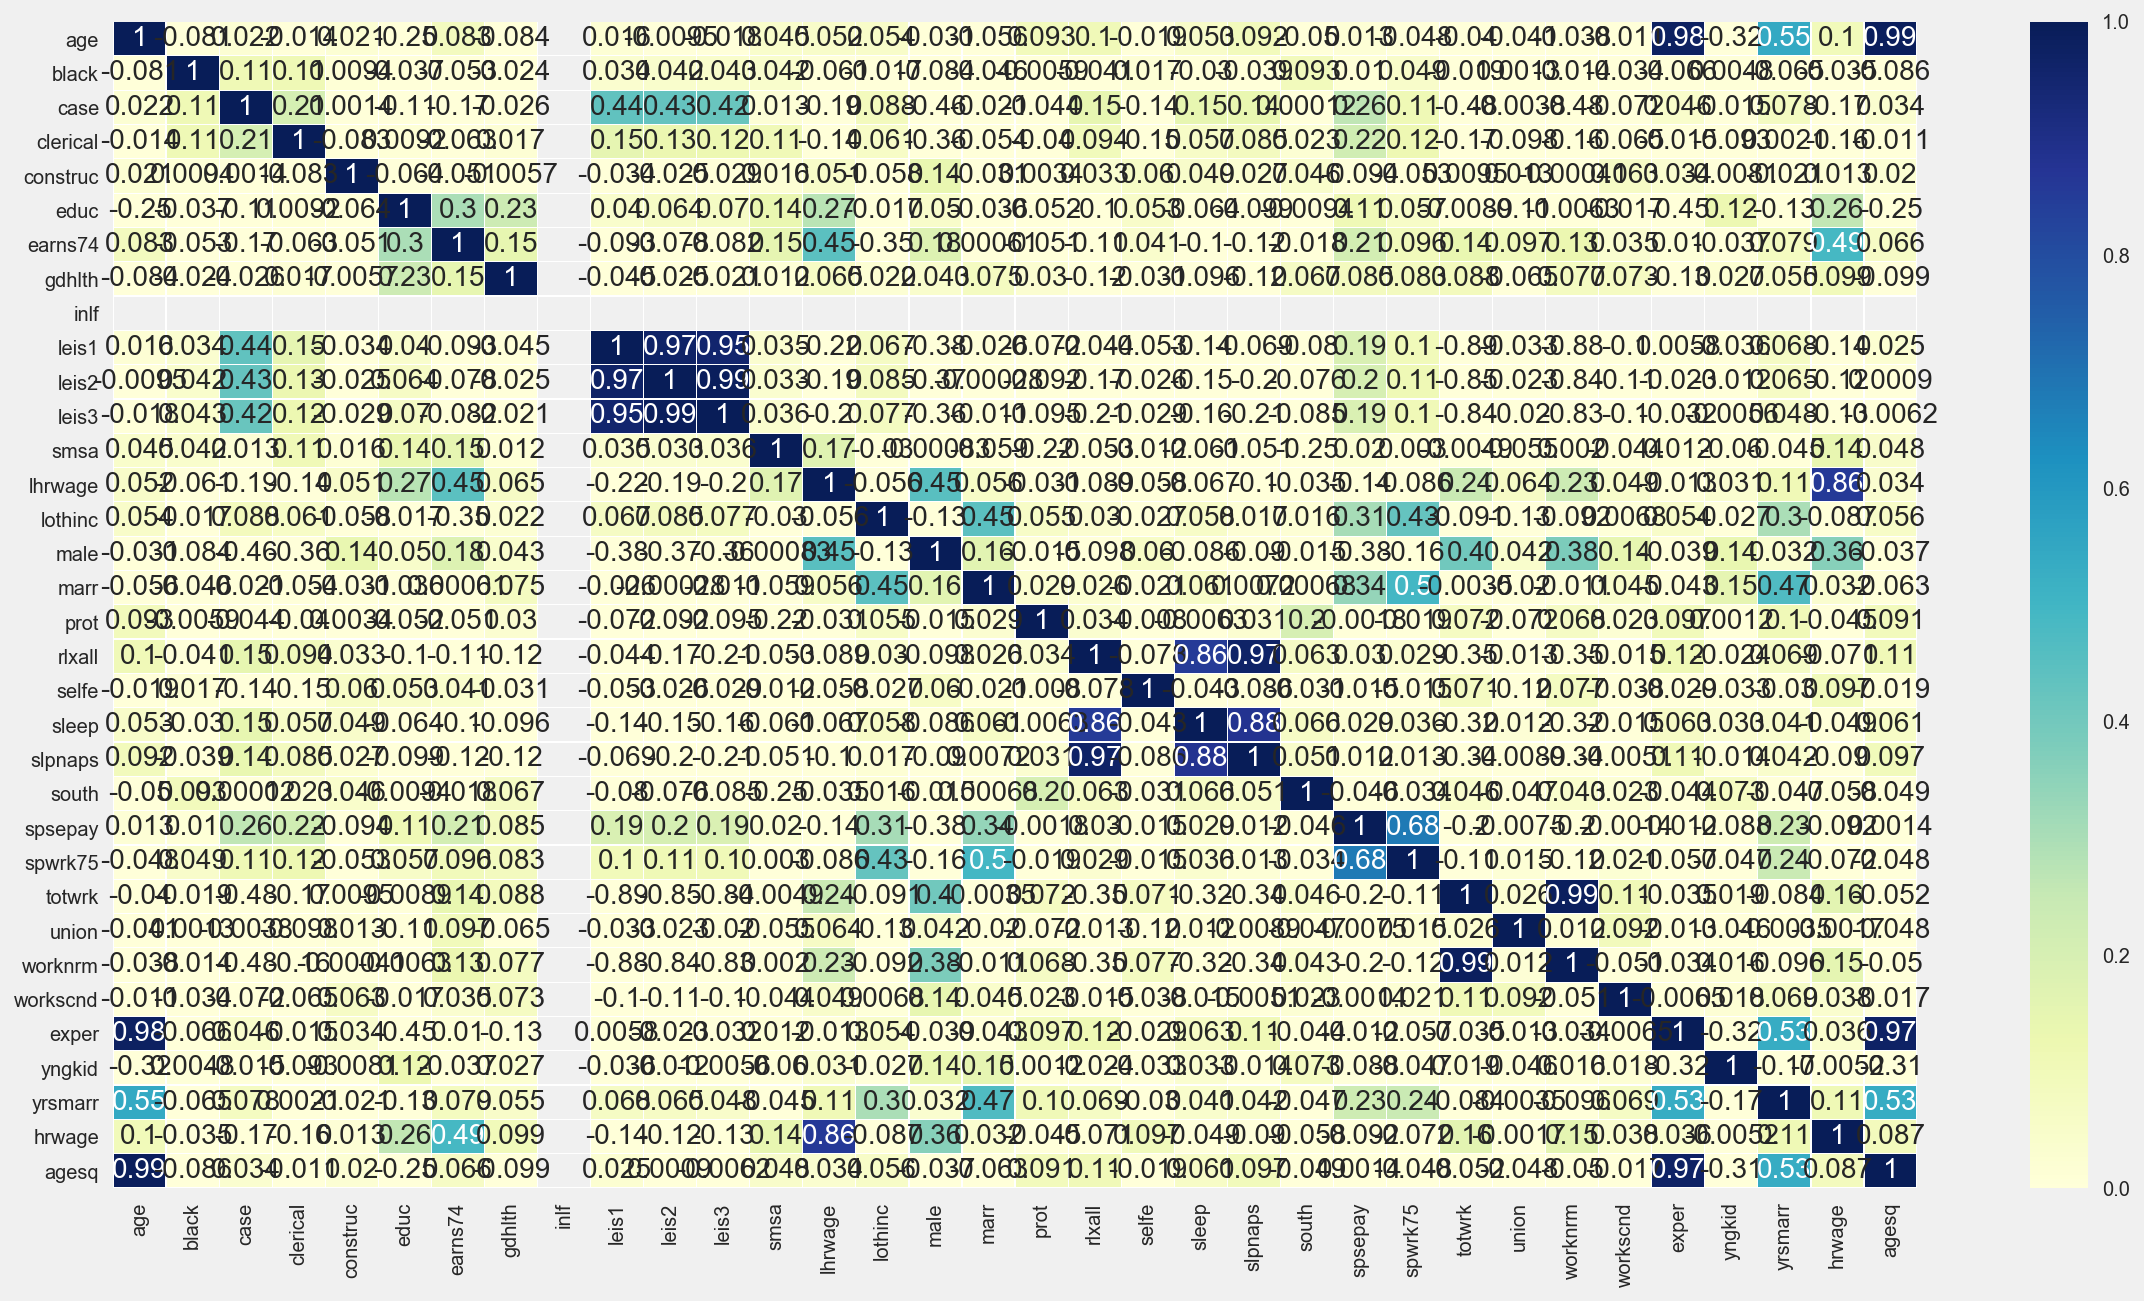

In [8]:
cor = plt.figure(figsize=(18,10))
ax = cor.gca()
sns.heatmap(df.corr(), annot=True, linewidths=.10, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()

## 4.1 Predictions
    Define y (mins sleep at night, per week)
    Define X (where X are your predictors => make sure to include the correct variables, i.e. exclude y, case, lothinc, and **other** variables)
    Standarized your Xs
    Train test split:
        splits your data into train test, 
        assigns a size of 30% to your test set, and use random_state=10
        print the shape of your train (X, y) and test (X, y)
---

In [9]:
y = df.sleep.values
col_list = df.columns.tolist()
exclude_cols = ['sleep', 'case', 'lothinc', 'leis1', 'leis2', 'leis3']
X = df[[i for i in col_list if i not in exclude_cols]]
print y.shape, X.shape

(532L,) (532, 28)


In [10]:
# , 'leidf['log_sleep'] = df.sleep.apply(np.log)

In [11]:
# formula1 = '''
# log_sleep ~ c(marr), totwrk, yrsmarr, C(male), age, agesq, educ,gdhlth 
# C(black), C(prot), C(yngkid),lhrwage -1
# '''
# formula1 = formula1.replace(",", "+")

In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() 
Xn = ss.fit_transform(X)

print (y.shape)
print ("\n=====\n")
print (Xn.shape)

(532L,)

=====

(532L, 28L)


In [13]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.30, random_state=10)
print ("Shape of X Y train:", X_train.shape,y_train.shape) 

print ("\n=====\n")

print ("Shape of X Y test:", X_test.shape,y_test.shape) 

('Shape of X Y train:', (372L, 28L), (372L,))

=====

('Shape of X Y test:', (160L, 28L), (160L,))


C:\Users\Shiv\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 531
Data columns (total 28 columns):
age         532 non-null int64
black       532 non-null int64
clerical    532 non-null float64
construc    532 non-null float64
educ        532 non-null int64
earns74     532 non-null int64
gdhlth      532 non-null int64
inlf        532 non-null int64
smsa        532 non-null int64
lhrwage     532 non-null float64
male        532 non-null int64
marr        532 non-null int64
prot        532 non-null int64
rlxall      532 non-null int64
selfe       532 non-null int64
slpnaps     532 non-null int64
south       532 non-null int64
spsepay     532 non-null int64
spwrk75     532 non-null int64
totwrk      532 non-null int64
union       532 non-null int64
worknrm     532 non-null int64
workscnd    532 non-null int64
exper       532 non-null int64
yngkid      532 non-null int64
yrsmarr     532 non-null int64
hrwage      532 non-null float64
agesq       532 non-null int64
dtypes: float64(4),

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() 


Xn = ss.fit_transform(X)

In [16]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print X_train.shape, y_train.shape
print "\n*************\n"
print X_test.shape, y_test.shape

(372, 28) (372L,)

*************

(160, 28) (160L,)


## 4.2 Machine Learning models 
    OLS, Regularization methods and evaluate the performance of your models on the train and test datasets
    Cross validate at least 10 times the R^2 scores of your models and print the average R^2 scores 
    For the OLS implement an scatter plot that shows the relation between your predicted values and the y_test values (the actual values)
    
---

## 4.2.1 OLS
    
---

In [17]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()

ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
print ("R^2:", ols.score(X_train, y_train))
print ("Coefficients:", ols.coef_)
print ("Intercept:", ols.intercept_)

('R^2:', 0.8092278021241297)
('Coefficients:', array([  1.05276918e-01,   1.20486181e+01,  -1.73786909e+01,
         7.73992848e+01,   7.69089069e-01,   6.32052899e-04,
         3.74959124e+01,  -3.61932706e-14,  -2.39456118e+01,
        -2.08840859e+01,  -3.95490035e+01,   8.70553503e+01,
        -5.87331421e+01,  -2.49748227e-02,   2.23371318e+01,
         8.17512997e-01,   1.87933552e+01,  -5.78027233e-04,
        -2.36288329e+00,  -1.79262529e-02,   2.48818011e+01,
         1.94447171e-02,  -3.73709701e-02,  -6.63812151e-01,
         5.94405857e+01,  -6.39800009e-01,   5.64438653e+00,
         3.78288268e-03]))
('Intercept:', 526.10134499110018)


In [19]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [20]:
def r2_mse(y_train, y_test, X_train, X_test, test, model):
    
    y_train_prd = model.predict(X_train)
    y_test_prd = model.predict(X_test)
    
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(y_train, y_train_prd),
        r2_score(y_test, y_test_prd)))
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(y_train, y_train_prd),
        mean_squared_error(y_test, y_test_prd)))
    

In [21]:
r2_mse(y_train, y_test, X_train, X_test, "OLS", ols)

R^2 OLS train data: 0.81, test data: 0.73
MSE OLS train data: 35880.32, test data: 48474.70


In [22]:
y_test_prd = ols.predict(X_test)

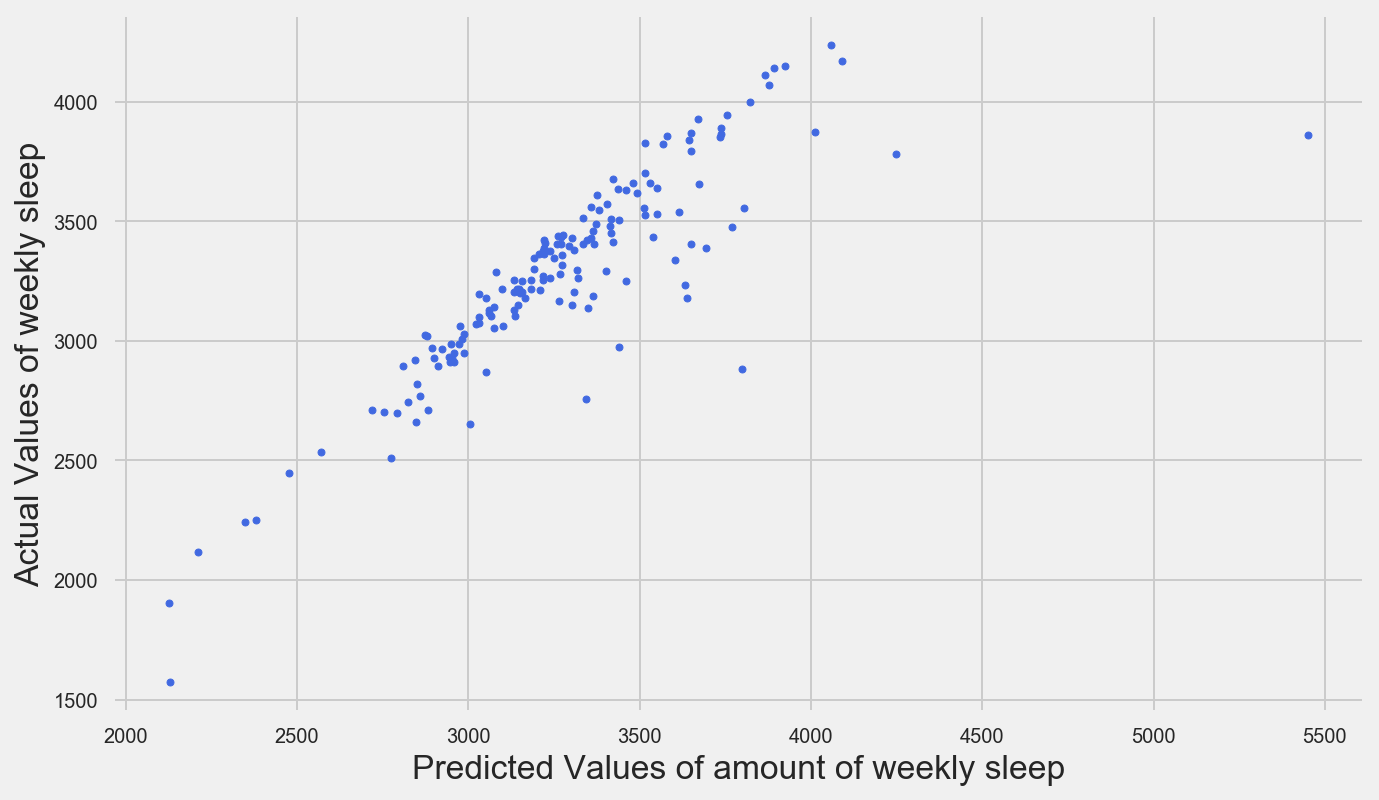

In [23]:
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test_prd, y_test, s=12, c='royalblue', marker='o')
plt.xlabel("Predicted Values of amount of weekly sleep")
plt.ylabel("Actual Values of weekly sleep")
plt.show()

## 4.2.2 Regularization
    
---

In [24]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [25]:
ridge_alp = np.logspace(0, 5, 100)
optimal_ridge = RidgeCV(alphas=ridge_alp, cv=10)
optimal_ridge.fit(X_train, y_train)
print (optimal_ridge.alpha_)

100000.0


In [26]:
ridge_sleep = Ridge(alpha=optimal_ridge.alpha_)

## Fit the Ridge regression
ridge_sleep.fit(X_train, y_train)

Ridge(alpha=100000.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [27]:
from sklearn.cross_validation import cross_val_score
ridge_sleep_score = cross_val_score(ridge_sleep, X_train, y_train, cv=10)

print (ridge_sleep_score)
print (np.mean(ridge_sleep_score))

[ 0.77705351  0.81780603  0.67500078  0.90584904  0.64738505  0.8597951
  0.83940244  0.61487048  0.6788539   0.92952873]
0.774554505675


In [28]:
r2_mse(y_train, y_test, X_train, X_test, "Ridge", ridge_sleep)

R^2 Ridge train data: 0.80, test data: 0.74
MSE Ridge train data: 38492.40, test data: 47343.95


In [29]:
optimal_lasso = LassoCV(n_alphas=300, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)
print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

1867.79607638


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [30]:
lasso_sleep = Lasso(alpha=optimal_lasso.alpha_)

lasso_sleep.fit(X_train, y_train)

Lasso(alpha=1867.796076378293, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [31]:
from sklearn.cross_validation import cross_val_score
lasso_sleep_score = cross_val_score(lasso_sleep, X_train, y_train, cv=10)

print (lasso_sleep_score)
print (np.mean(lasso_sleep_score))

[ 0.77808095  0.81861735  0.68038465  0.91088678  0.65126267  0.85886628
  0.83510786  0.61770876  0.68839696  0.92930282]
0.776861507615


In [32]:
r2_mse(y_train, y_test, X_train, X_test, "Lasso", lasso_sleep)

R^2 Lasso train data: 0.79, test data: 0.74
MSE Lasso train data: 38586.65, test data: 47107.95


In [33]:
l1_ratios = np.linspace(0.01, 1.0, 50)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5, verbose=1)
optimal_enet.fit(X_train, y_train)
print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

1783.45669765
1.0


In [34]:
enet_sleep = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)


enet_sleep.fit(X_train, y_train)

ElasticNet(alpha=1783.4566976451076, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [35]:

enet_sleep_score = cross_val_score(enet_sleep, X_train, y_train, cv=10)

print (enet_sleep_score)
print (np.mean(enet_sleep_score))

[ 0.77805752  0.81865284  0.68016517  0.91094041  0.65123526  0.85896461
  0.83531988  0.61769944  0.68823949  0.92935342]
0.776862802872


In [36]:
r2_mse(y_train, y_test, X_train, X_test, "ElasticNet", enet_sleep)

R^2 ElasticNet train data: 0.79, test data: 0.74
MSE ElasticNet train data: 38584.75, test data: 47119.76


## 4.2.3 What are the features that are the best predictors of mins sleep at night, per week
    What are the features with coefficients greater than 0
---

In [39]:
def best_reg_method(X, best):
    method_coefs = pd.DataFrame({'variable':X.columns, 
                                 'coef':best.coef_, 
                                 'abs_coef':np.abs(best.coef_)})
    method_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    
    return method_coefs.head(10)

In [40]:
best_reg_method(X, ridge_sleep)

,abs_coef,coef,variable
15,0.786970,0.786970,slpnaps
25,0.186352,0.186352,yrsmarr
26,0.121997,0.121997,hrwage
23,0.044193,-0.044193,exper
12,0.037543,-0.037543,prot
11,0.032582,0.032582,marr
22,0.030355,-0.030355,workscnd
24,0.027741,0.027741,yngkid
4,0.025158,0.025158,educ
0,0.019036,-0.019036,age


In [41]:
best_reg_method(X, lasso_sleep)

,abs_coef,coef,variable
15,0.777691,0.777691,slpnaps
27,0.015958,-0.015958,agesq
19,0.002860,-0.002860,totwrk
5,0.000926,0.000926,earns74
17,0.000626,0.000626,spsepay
26,0.000000,0.000000,hrwage
25,0.000000,0.000000,yrsmarr
24,0.000000,0.000000,yngkid
23,0.000000,-0.000000,exper
22,0.000000,-0.000000,workscnd


In [42]:
best_reg_method(X, enet_sleep)

,abs_coef,coef,variable
15,0.778045,0.778045,slpnaps
27,0.016075,-0.016075,agesq
19,0.002905,-0.002905,totwrk
5,0.000932,0.000932,earns74
17,0.000624,0.000624,spsepay
26,0.000000,0.000000,hrwage
25,0.000000,0.000000,yrsmarr
24,0.000000,0.000000,yngkid
23,0.000000,-0.000000,exper
22,0.000000,-0.000000,workscnd


## 4.2.3.1 Bonus
    Define a function that creates and prints the distribution of residuals on the train and test data from all the methods
---

## 4.2.4 Regression Tree 
    Gridsearch your tree
    Print the best parameters and best score from your gridsearch.
    Evaluate the performance of your tree
    Print the features that best explain your Y, are these features the same as the features you found before from the regularization methods or OLS
    
    OPTIONAL: Visualize the tree ONLY if your computer lets you do it. Your grade won't be penalized for not printing the tree, nor you will receive extra points for visualization the tree
---

In [43]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

## Here is the gridsearch
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

# ## Here crossvalidate 
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=5, verbose=1)

C:\Users\Shiv\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [44]:
dtr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    5.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [45]:
## Print Best Estimator, parameters and score
''' dtr_best = is the regression tree regressor with best parameters/estimators'''
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': None, 'min_samples_split': 5, 'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 1}


best score 0.778500771702


In [46]:
## Print the features that best explain your Y
''' Here I am defining a function to print feature importance using best models'''
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance  

In [47]:
feature_importance(X, dtr_best)

,feature,importance
15,slpnaps,1.0
0,age,0.0
1,black,0.0
26,hrwage,0.0
25,yrsmarr,0.0
24,yngkid,0.0
23,exper,0.0
22,workscnd,0.0
21,worknrm,0.0
20,union,0.0


In [48]:
r2_mse(y_train, y_test, X_train, X_test, "Regression Tree", dtr_best)

R^2 Regression Tree train data: 0.83, test data: 0.77
MSE Regression Tree train data: 31371.19, test data: 40384.28


4.2.5 Random Forest Regression Tree
Make sure you gridsearch your Random Forest
Evaluate the performance
Print the features that best explain mins sleep at night, per week

In [49]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5],  
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
          'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)

In [50]:
estimator_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   21.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 4], 'max_leaf_nodes': [5, 6, 7], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [51]:
## Print the best estimator, parameters and score
''' rfr_best = is the random forest regression tree regressor with best parameters/estimators'''
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=7, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


best parameters {'min_samples_split': 3, 'max_leaf_nodes': 7, 'n_estimators': 100, 'max_depth': 3}


best score 0.803617666469


In [52]:
feature_importance(X, rfr_best)

,feature,importance
15,slpnaps,0.774351
13,rlxall,0.215199
5,earns74,0.001667
4,educ,0.001621
8,smsa,0.001222
12,prot,0.001215
21,worknrm,0.001070
0,age,0.000901
27,agesq,0.000762
17,spsepay,0.000523


In [53]:
r2_mse(y_train, y_test, X_train, X_test, "Regression Tree", rfr_best)

R^2 Regression Tree train data: 0.85, test data: 0.79
MSE Regression Tree train data: 27435.51, test data: 37658.38


## 5. Based on the MSE and R^2, in your opinion which model perform best and why?
---

Based on the MSE and R^2 I would suggest Random Forest method as it has got the lowest mean square error and hightest R^2 both for train and test data sets.

## 6. Was there any trade off between bias and variance whem implementing the models?
    
---

ANS: Looking at the lambda values for Ridge, Lasso and ElasticNet it is clear that the OLS was biases due to multicollinearity and the variance of all these models is higher than the OLS which indicates that indeed there is tradeoff between bias and variance.

## 7. Explain the Bias Variance trade in the model you selected?
    
---

ANS:

Although the OLS has lower MSE for the train data set it has higher MSE for the test data set for the all other methods the test MSE is lower than that for OLS which indicates towards bias in the OLS that might occure because of some highly correlated variables such as experiance and age, age and age squared.